In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def action():
    trans = [1]
    while True:
        cand = actdict[trans[-1]]
        trans.append(np.random.choice(cand, 1)[0])
        if trans[-1] in terminal:
            break
    return trans

def reward(trans, trial):
    if np.sum(np.array(trans) == 3) == 1:
        return 1
    else:
        return 0
    
def get_HC(trans):
    base = {1:5,2:6,3:7,4:8}
    counter = {1:0,2:0,3:0,4:0}
    trans2 = []
    for t in trans:
        trans2.append([t,base[t] +counter[t]*4])
        counter[t] += 1
        if t == 3:
            counter[4] += 1 
    return trans2
    
def learn_HC2HC(HCnet, HC, rwd, rwd_):
    alpha = 0.2
    HCnet *= 0.95
    for h in range(len(HC)-1):
        x1, x2 = np.array(HC[h])-1
        y1, y2 = np.array(HC[h+1])-1
        df = (rwd - rwd_)*alpha
        df = df*1.1 if df > 0 else df
        HCnet[y1,x1] += df*(1 - HCnet[y1,x1])*(1 + HCnet[y1,x1])
        HCnet[y2,x1] += df*(1 - HCnet[y2,x1])*(1 + HCnet[y2,x1])
        HCnet[y1,x2] += df*(1 - HCnet[y1,x2])*(1 + HCnet[y1,x2])
        HCnet[y2,x2] += df*(1 - HCnet[y2,x2])*(1 + HCnet[y2,x2])
    return HCnet

In [28]:
actdict = {1: [2], 2: [3,4], 3: [2], 4: [1]}  
terminal = [4]
HC_nodes = 1000
HCnet = np.zeros((HC_nodes,HC_nodes))
episode = []
rwds = [0]
for t in range(100):
    trans = action()
    rwd = reward(trans, t)
    HC = get_HC(trans)
    HCnet = learn_HC2HC(HCnet, HC, rwd, np.mean(rwds))
    rwds.append(rwd)
    episode.append(action())

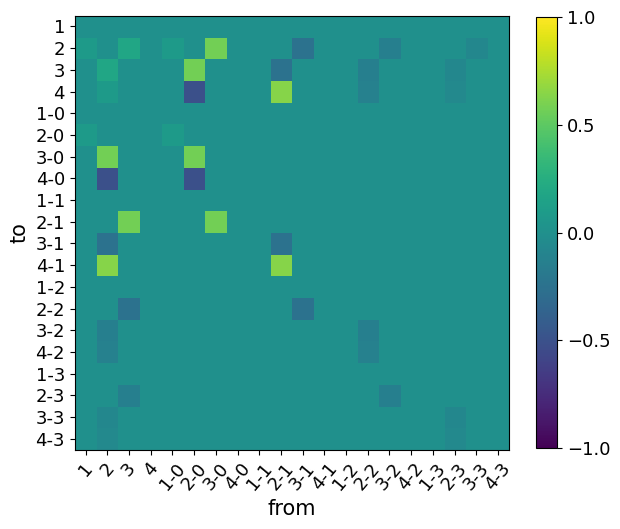

In [29]:
mx = 20
plt.figure(figsize=(7,7))
im = plt.imshow(HCnet[:mx,:mx], vmin = -1, vmax = 1)
tck = ["1","2","3","4"]
for i in range(4,mx):
    st = "{}-{}".format(np.mod(i,4)+ 1, int(i/4)-1)
    tck.append(st)
plt.xticks(np.arange(mx), tck, rotation = 50, fontsize = 13)
plt.yticks(np.arange(mx), tck, fontsize = 13)
plt.xlabel("from", fontsize = 15)
plt.ylabel("to", fontsize = 15)
plt.colorbar(ticks=np.arange(-1,1.2,0.5), shrink = 0.8)
im.figure.axes[1].tick_params(axis="y", labelsize=13)
plt.savefig("./figure/dropby.png", bbox_inches = "tight")

In [30]:
def reward(trans, trial):
    if np.mod(trial, 60) < 30:
        return 4 in trans
    else:
        return 5 in trans
    
def get_HC(trans):
    base = {1:6,2:7,3:8,4:9,5:10}
    counter = {1:0,2:0,3:0,4:0,5:0}
    trans2 = []
    for t in trans:
        trans2.append([t,base[t] +counter[t]*len(base)])
        counter[t] += 1
        if t == 3:
            counter[4] += 1
            counter[5] += 1
    return trans2   

In [39]:
actdict = {1: [2,3], 2: [4,5], 3: [4,5], 4: [1], 5:[1]}      
terminal = [4,5]
HC_nodes = 1000
HCnet = np.zeros((HC_nodes,HC_nodes))
episode = []
rwds = [0]
for t in range(30):
    trans = action()
    rwd = reward(trans, t)
    HC = get_HC(trans)
    HCnet = learn_HC2HC(HCnet, HC, rwd, np.mean(rwds))
    rwds.append(rwd)
    episode.append(action())

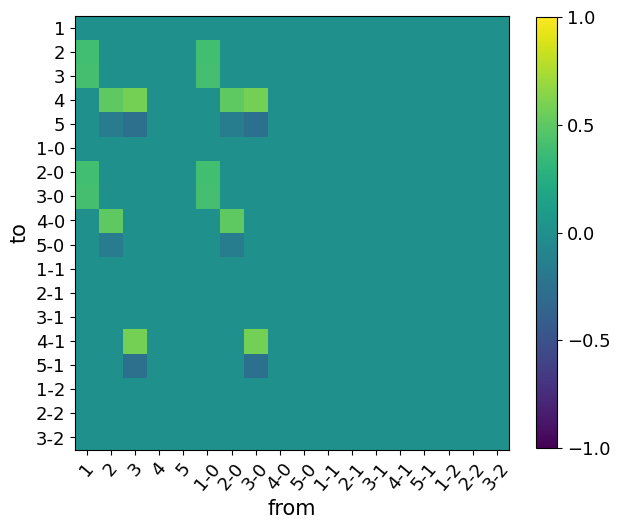

In [40]:
mx = 18
plt.figure(figsize=(7,7))
im = plt.imshow(HCnet[:mx,:mx], vmin = -1, vmax = 1)
tck = ["1","2","3","4","5"]
for i in range(5,mx):
    st = "{}-{}".format(np.mod(i,5)+1, int(i/5)-1)
    tck.append(st)
plt.xticks(np.arange(mx), tck, rotation = 50, fontsize = 13)
plt.yticks(np.arange(mx), tck, fontsize = 13)
plt.xlabel("from", fontsize = 15)
plt.ylabel("to", fontsize = 15)
plt.colorbar(ticks=np.arange(-1,1.2,0.5), shrink = 0.8)
im.figure.axes[1].tick_params(axis="y", labelsize=13)
plt.savefig("./figure/ignore.png", bbox_inches = "tight")